# Heart Disease Markers

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Gathering](#gather)
- [Part II - Exploration](#explore)
    - [Question 1: ](#q1)
    - [Question 2: ](#q2)
    - [Question 3: ](#q3)
- [Part III - Conclusion](#onc)
***

***

<a id='intro'></a>
## Introduction

Heart disease remains to be one of the top killers of people across the United States. [According to the CDC](https://www.cdc.gov/heartdisease/facts.htm), about 1 in every 4 deaths is the US is due to heart disease which costs the US over 210 billion dollars per year.

This projects seeks to answer some key questions about heart disease in the United States using a publically available dataset compiled by the University of California, Irvine, acquired from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). 

*Imports*

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sb
%matplotlib inline

print("Imports successful.")

Imports successful.


***

***

<a id='gather'></a>
## Part I: Data Gathering

There are 14 attributes in the dataset for 297 patients:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type <br>
-- Value 0: typical angina<br>
-- Value 1: atypical angina<br>
-- Value 2: non-anginal pain<br>
-- Value 3: asymptomatic<br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholesterol in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results <br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment <br>
-- Value 0: upsloping<br>
-- Value 1: flat<br>
-- Value 2: downsloping<br>
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
14. condition: 0 = no disease, 1 = disease


From the preliminary exploration below, we see that the dataset is clean. There are no missing values and all the descriptive statistics seem reasonable. 

The column names, however, are confusing to non-specialists so they will be renamed. 

In [27]:
df = pd.read_csv('heart.csv')

df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'disease']

df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [28]:
df.shape

(297, 14)

In [29]:
df.isnull().sum()

age                       0
sex                       0
chest_pain                0
resting_blood_pressure    0
serum_cholesterol         0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
st_depression             0
st_slope                  0
num_major_vessels         0
thalassemia               0
disease                   0
dtype: int64

In [30]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     297 non-null    int64  
 1   sex                     297 non-null    int64  
 2   chest_pain              297 non-null    int64  
 3   resting_blood_pressure  297 non-null    int64  
 4   serum_cholesterol       297 non-null    int64  
 5   fasting_blood_sugar     297 non-null    int64  
 6   rest_ecg                297 non-null    int64  
 7   max_heart_rate          297 non-null    int64  
 8   exercise_angina         297 non-null    int64  
 9   st_depression           297 non-null    float64
 10  st_slope                297 non-null    int64  
 11  num_major_vessels       297 non-null    int64  
 12  thalassemia             297 non-null    int64  
 13  disease                 297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.

In [35]:
df.disease.value_counts() 

# 160 patients do not have heart disease and 137 do

0    160
1    137
Name: disease, dtype: int64

***

***


<a id='explore'></a>
## Part III: Exploration 


First, we will do some preliminary data exploration/visualization. This will inform our research questions. 


Most of the histograms do not provide interesting data as most are really categorical data, not numeric. However, some insights to note are that we see a clear distribution of ages and a relatively low peak for cholesterol levels. 


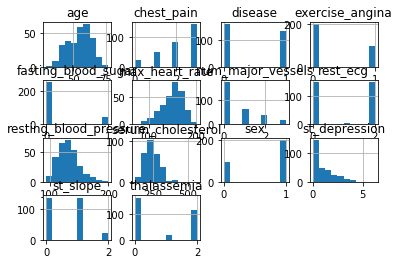

In [32]:
df.hist();

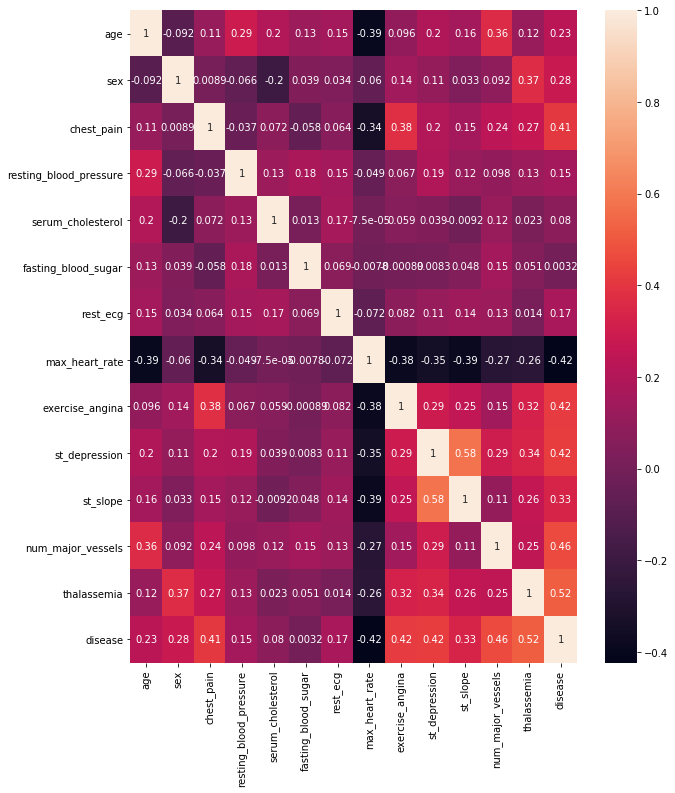

In [33]:
plt.figure(figsize=(10, 12))
sb.heatmap(df.corr(), annot=True);

From the heatmap, we see that there are no significant correlations. However, let's try again with separated datasets for patients with heart disease and those without. 

In [38]:
disease = df[df.disease == 0]
no_disease = df[df.disease == 1]

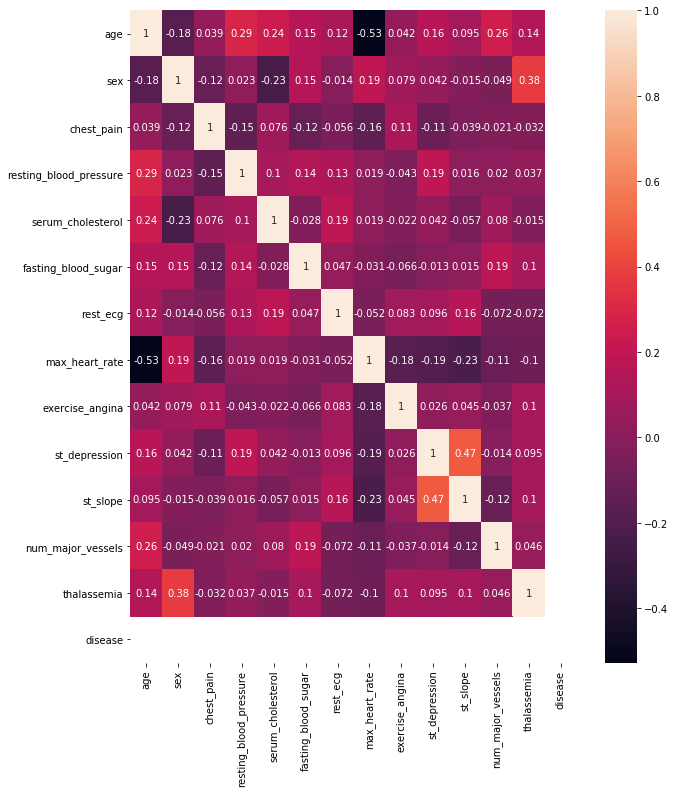

In [39]:
plt.figure(figsize=(10, 12))
sb.heatmap(disease.corr(), annot=True);

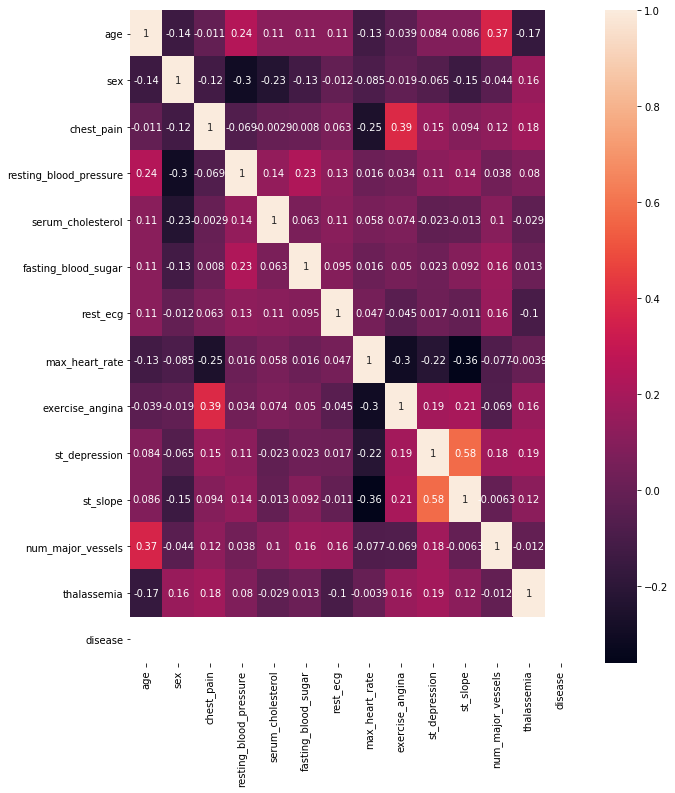

In [41]:
plt.figure(figsize=(10, 12))
sb.heatmap(no_disease.corr(), annot=True);

While there are still no strong correlations in either of the heatmaps, we do see different trends of correlation, which might be interesting to explore further. For example, there are a lot more negative correlations for the no disease dataset. 

<a id='q1'></a>
### Question 1: What factors are most impacted by patient gender?

First, the dataset must be divided into two by gender. 

In [44]:
male = df[df.sex == 1]
fem = df[df.sex == 0]

In [214]:
male.shape

(201, 14)

In [216]:
fem.shape

(96, 14)

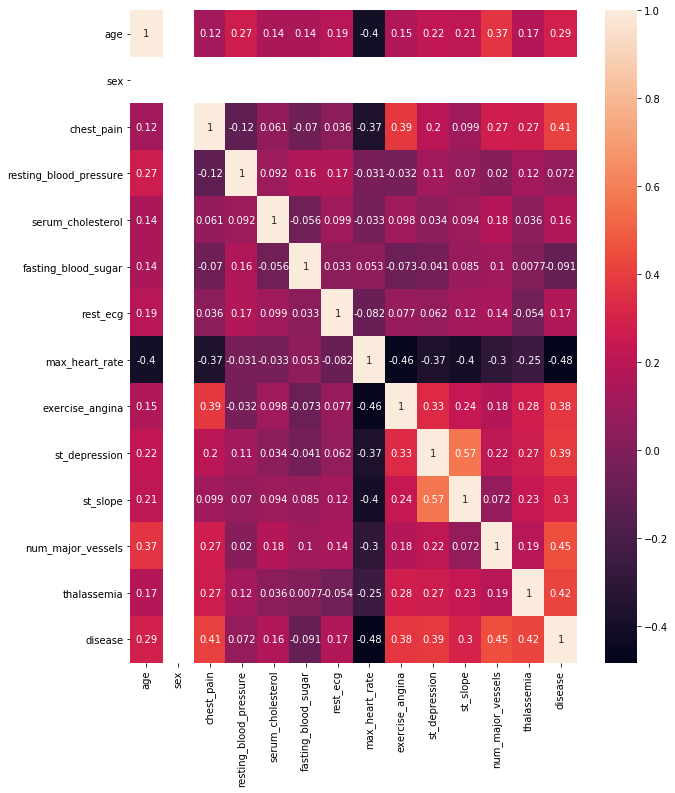

In [45]:
plt.figure(figsize=(10, 12))
sb.heatmap(male.corr(), annot=True);

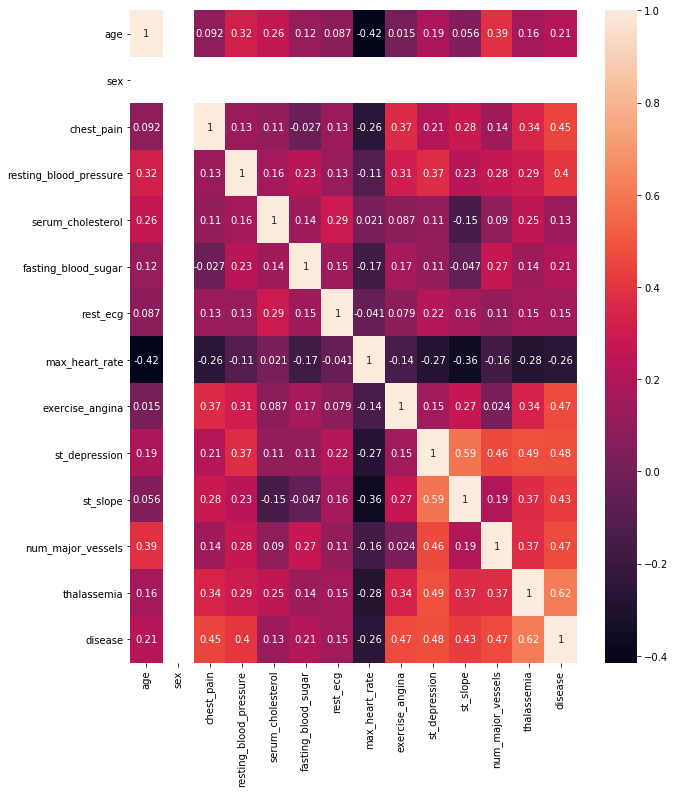

In [46]:
plt.figure(figsize=(10, 12))
sb.heatmap(fem.corr(), annot=True);

We see slightly more correlations for females than for males, but still nothing strikingly significant. 

Let's use the previously made disease dataset to look at the distribution of age for patients with heart disease of different genders. 

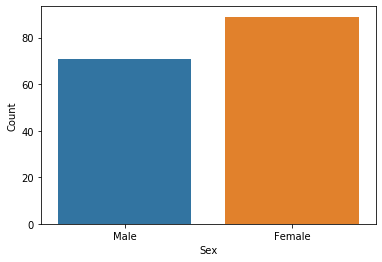

In [225]:
g = sb.countplot(x=disease.sex)
plt.xlabel("Sex")
plt.ylabel("Count")
g.set_xticklabels(['Male', 'Female']);

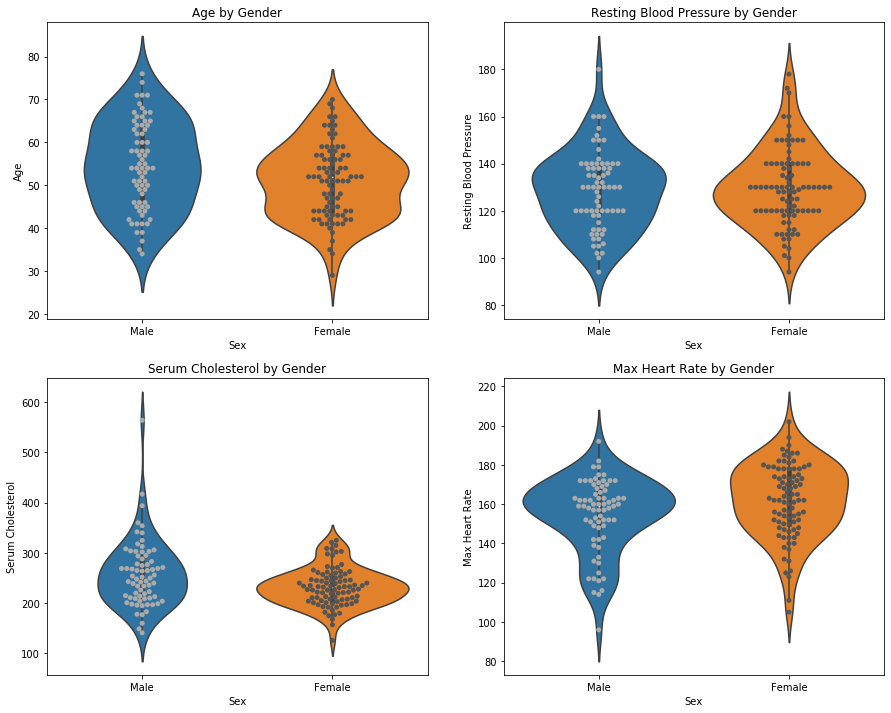

In [257]:
f, axs = plt.subplots(2,2,figsize=(15,12))

# Plot 1: Age and sex
plt.subplot(2,2,1)

ax1 = sb.violinplot(x=disease.sex, y=disease.age, data=disease, alpha=0.3)
  
g = sb.swarmplot(x=disease.sex, y=disease.age, data=disease, palette='gray_r')
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age by Gender")
g.set_xticklabels(['Male', 'Female']);

# Plot 2: Resting blood pressure and sex
plt.subplot(2,2,2)

ax2 = sb.violinplot(x=disease.sex, y=disease.resting_blood_pressure, data=disease, alpha=0.3)
  
g = sb.swarmplot(x=disease.sex, y=disease.resting_blood_pressure, data=disease, palette='gray_r')
plt.xlabel("Sex")
plt.ylabel("Resting Blood Pressure")
plt.title("Resting Blood Pressure by Gender")
g.set_xticklabels(['Male', 'Female']);


# Plot 3: Serum cholesterol and sex
plt.subplot(2,2,3)

ax3 = sb.violinplot(x=disease.sex, y=disease.serum_cholesterol, data=disease, alpha=0.3)

g = sb.swarmplot(x=disease.sex, y=disease.serum_cholesterol, data=disease, palette='gray_r')
plt.xlabel("Sex")
plt.ylabel("Serum Cholesterol")
plt.title("Serum Cholesterol by Gender")
g.set_xticklabels(['Male', 'Female']);


# Plot 4: Max heart rate and sex
plt.subplot(2,2,4)

ax4 = sb.violinplot(x=disease.sex, y=disease.max_heart_rate, data=disease)
    
g = sb.swarmplot(x=disease.sex, y=disease.max_heart_rate, data=disease, palette='gray_r')
plt.xlabel("Sex")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate by Gender")
g.set_xticklabels(['Male', 'Female']);



From these visualizations, we see some differences between men and women who have heart disease: 

- Men are likely to be older 
- Men have a more skewed serum cholesterol
- Females tend to have higher max heart rates

<a id='q2'></a>
### Question 2: Is there a difference in symptoms for patients in different age groups?

First, lets divide our dataset into 3 age brackets:

- young: below 40
- middle age: 40 to 60
- elder: above 60

In [154]:
young_nd = no_disease[no_disease.age < 40]
middle_age_nd = no_disease[(no_disease.age>=40)&(no_disease.age<60)]
elder_nd = no_disease[no_disease.age >= 60]

In [115]:
young = disease[disease.age < 40]
middle_age = disease[(disease.age>=40)&(disease.age<60)]
elder = disease[disease.age >= 60]

young.describe()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease
count,10.000000,10.000000,10.000000,10.000000,10.0000,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.0,10.0
mean,35.800000,0.500000,1.600000,124.800000,217.6000,0.0,0.600000,179.400000,0.0,0.560000,0.300000,0.0,0.0,0.0
std,3.119829,0.527046,0.843274,13.766303,41.4493,0.0,0.966092,13.492385,0.0,1.133529,0.674949,0.0,0.0,0.0
min,29.000000,0.000000,0.000000,94.000000,182.0000,0.0,0.000000,152.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,34.250000,0.000000,1.000000,118.500000,193.7500,0.0,0.000000,174.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,36.000000,0.500000,2.000000,126.000000,207.0000,0.0,0.000000,180.500000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,38.500000,1.000000,2.000000,136.000000,218.7500,0.0,1.500000,185.750000,0.0,0.525000,0.000000,0.0,0.0,0.0
max,39.000000,1.000000,3.000000,140.000000,321.0000,0.0,2.000000,202.000000,0.0,3.500000,2.000000,0.0,0.0,0.0


In [116]:
middle_age.describe()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.0
mean,49.741071,0.633929,1.821429,127.125000,238.669643,0.142857,0.839286,161.830357,0.160714,0.540179,0.401786,0.196429,0.392857,0.0
std,5.769984,0.483894,0.892555,14.901554,42.896563,0.351500,0.991437,15.875580,0.368918,0.745130,0.592138,0.550827,0.775261,0.0
min,40.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,44.000000,0.000000,1.000000,120.000000,207.750000,0.000000,0.000000,153.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,51.000000,1.000000,2.000000,130.000000,235.500000,0.000000,0.000000,163.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0
75%,54.000000,1.000000,2.250000,136.500000,264.250000,0.000000,2.000000,172.250000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,59.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,194.000000,1.000000,4.200000,2.000000,3.000000,2.000000,0.0


In [117]:
elder.describe()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,65.631579,0.342105,1.763158,136.368421,264.526316,0.184211,0.921053,143.526316,0.131579,0.781579,0.473684,0.578947,0.421053,0.0
std,3.787754,0.480783,1.050977,19.205040,75.989593,0.392859,0.996794,19.394534,0.342570,0.799613,0.603451,0.826310,0.792927,0.0
min,60.000000,0.000000,0.000000,102.000000,149.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,63.000000,0.000000,1.000000,120.000000,223.750000,0.000000,0.000000,131.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,65.000000,0.000000,2.000000,140.000000,244.000000,0.000000,0.000000,147.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0
75%,67.750000,1.000000,2.750000,150.000000,296.000000,0.000000,2.000000,156.500000,0.000000,1.425000,1.000000,1.000000,0.000000,0.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,179.000000,1.000000,2.600000,2.000000,3.000000,2.000000,0.0


Just from the describe, we see that the majority of patients are in the middle age bracket.

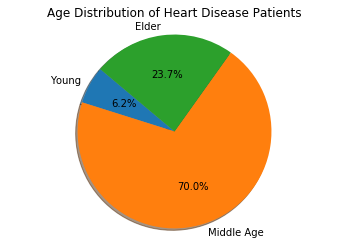

In [118]:
label = ['Young', 'Middle Age', 'Elder']
values = (len(young), len(middle_age), len(elder))

plt.pie(values, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Age Distribution of Heart Disease Patients")
plt.show()

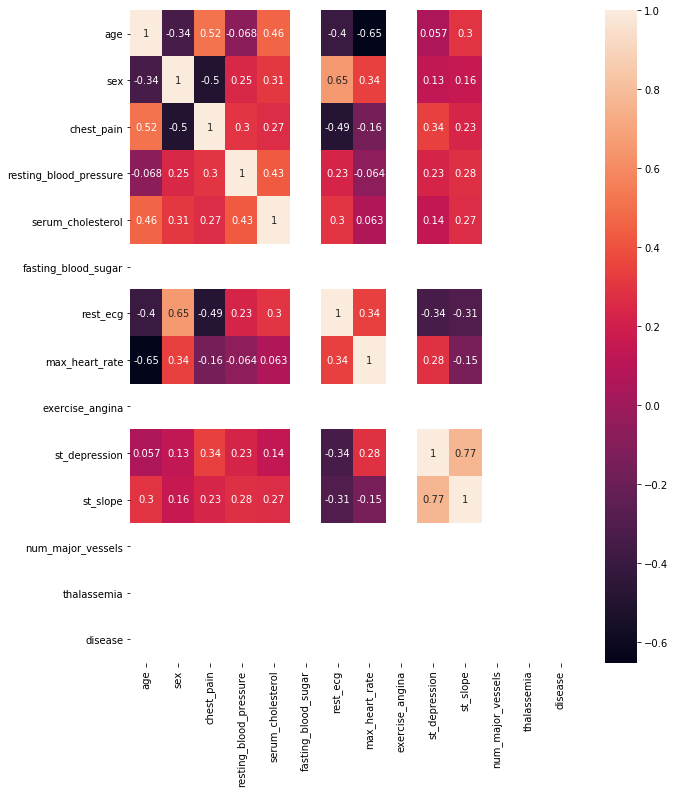

In [122]:
plt.figure(figsize=(10, 12))
sb.heatmap(young.corr(), annot=True);

# There are a lot of 0 values for younger patients, leading to missing rows/columns in the heatmap

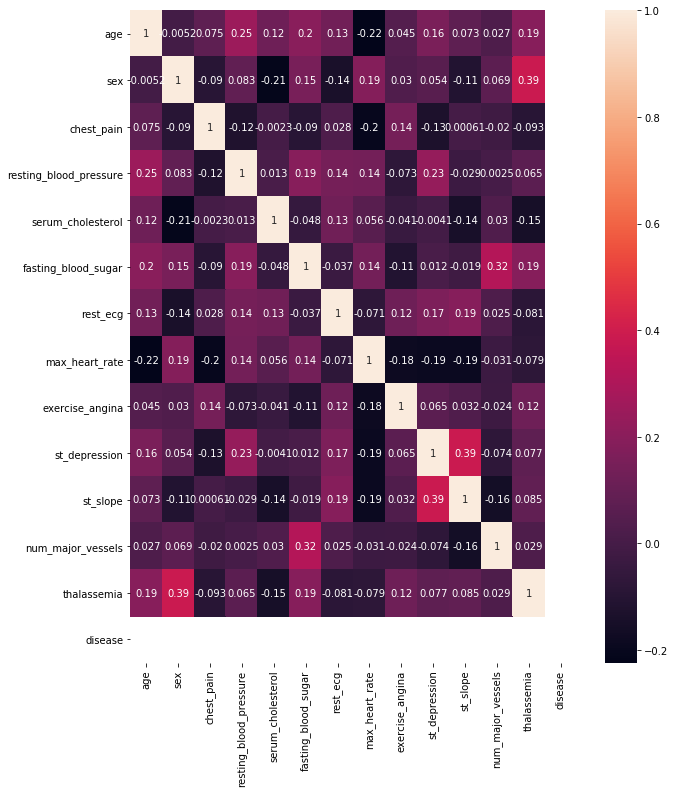

In [120]:
plt.figure(figsize=(10, 12))
sb.heatmap(middle_age.corr(), annot=True);

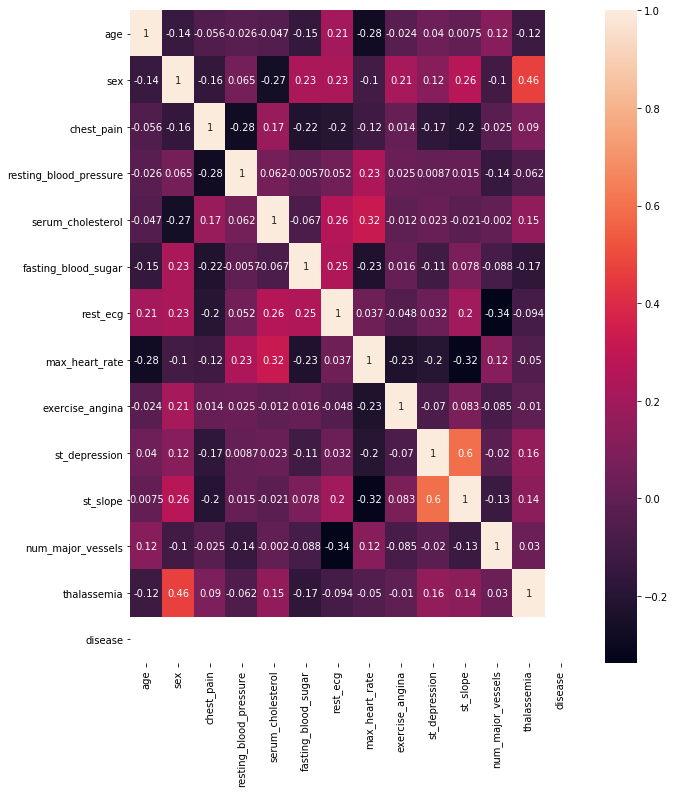

In [121]:
plt.figure(figsize=(10, 12))
sb.heatmap(elder.corr(), annot=True);

In looking at the heatmaps, gender led to more correlations than age, but there have still been no strong correlations identified. 

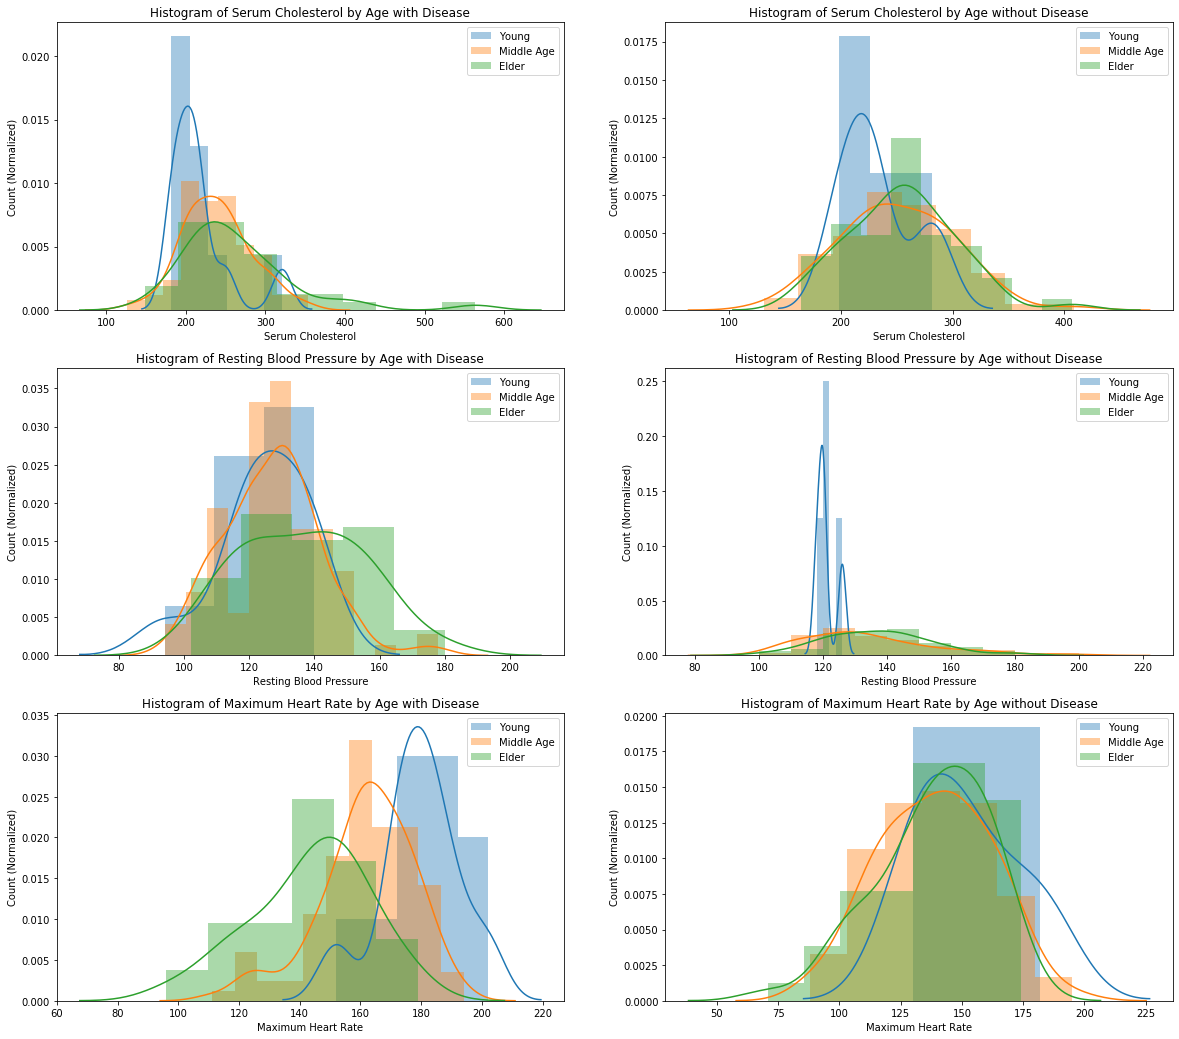

In [259]:
f, axs = plt.subplots(3,2,figsize=(20,18))


# Serum cholestrol by age and disease status

plt.subplot(3,2,1)

sb.distplot(young.serum_cholesterol, norm_hist=True)
sb.distplot(middle_age.serum_cholesterol, norm_hist=True)
sb.distplot(elder.serum_cholesterol, norm_hist=True)
plt.title("Histogram of Serum Cholesterol by Age with Disease")
plt.xlabel("Serum Cholesterol")
plt.ylabel("Count (Normalized)")
plt.legend(labels=['Young', 'Middle Age', 'Elder']);


plt.subplot(3,2,2)

sb.distplot(young_nd.serum_cholesterol, norm_hist=True)
sb.distplot(middle_age_nd.serum_cholesterol, norm_hist=True)
sb.distplot(elder_nd.serum_cholesterol, norm_hist=True)
plt.title("Histogram of Serum Cholesterol by Age without Disease")
plt.xlabel("Serum Cholesterol")
plt.ylabel("Count (Normalized)")
plt.legend(labels=['Young', 'Middle Age', 'Elder']);


# Resting blood pressure by age and disease status
plt.subplot(3,2,3)

sb.distplot(young.resting_blood_pressure, norm_hist=True)
sb.distplot(middle_age.resting_blood_pressure, norm_hist=True)
sb.distplot(elder.resting_blood_pressure, norm_hist=True)
plt.title("Histogram of Resting Blood Pressure by Age with Disease")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Count (Normalized)")
plt.legend(labels=['Young', 'Middle Age', 'Elder']);


plt.subplot(3,2,4)

sb.distplot(young_nd.resting_blood_pressure, norm_hist=True)
sb.distplot(middle_age_nd.resting_blood_pressure, norm_hist=True)
sb.distplot(elder_nd.resting_blood_pressure, norm_hist=True)
plt.title("Histogram of Resting Blood Pressure by Age without Disease")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Count (Normalized)")
plt.legend(labels=['Young', 'Middle Age', 'Elder']);



# Maximum heart rate by age and disease status
plt.subplot(3,2,5)

sb.distplot(young.max_heart_rate, norm_hist=True)
sb.distplot(middle_age.max_heart_rate, norm_hist=True)
sb.distplot(elder.max_heart_rate, norm_hist=True)
plt.title("Histogram of Maximum Heart Rate by Age with Disease")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Count (Normalized)")
plt.legend(labels=['Young', 'Middle Age', 'Elder']);


plt.subplot(3,2,6)

sb.distplot(young_nd.max_heart_rate, norm_hist=True)
sb.distplot(middle_age_nd.max_heart_rate, norm_hist=True)
sb.distplot(elder_nd.max_heart_rate, norm_hist=True)
plt.title("Histogram of Maximum Heart Rate by Age without Disease")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Count (Normalized)")
plt.legend(labels=['Young', 'Middle Age', 'Elder']);

We do see some interesting trends in the histogram data. Younger patients tend to have lower serum cholesterol and higher maximum heart rates. Age seems to not have an impact on resting blood pressure, likely because this already has such a small range. 

<a id='q3'></a>
### Question 3: What factors best predict heart disease risk?

Previously, we saw that no one factor had a strong correlation with disease status. Now, lets build a model to see if we can predict heart disease.

In [184]:
features = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'disease']

model_df = df

X = model_df.drop(['disease'], axis=1)
Y = model_df['disease']

train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, random_state=13)

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import eli5
from eli5.sklearn import PermutationImportance
print("Imports successful.")

Imports successful.


In [199]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()

In [200]:
dt.fit(train_features, train_labels)
lr.fit(train_features, train_labels)

/Users/mehrnazsiavoshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
dt_pred_train = dt.predict(train_features)
lr_pred_train = lr.predict(train_features)

dt_pred_test = dt.predict(test_features)
lr_pred_test = lr.predict(test_features)

In [202]:
dt_prob = dt.predict_proba(test_features)[:,1]
lr_prob = lr.predict_proba(test_features)[:,1]

In [205]:
print(classification_report(test_labels,dt_pred_test))
print('Decision Tree: ' + str(roc_auc_score(test_labels, dt_pred_test)))

print(classification_report(test_labels,lr_pred_test))
print('Logistic Regression: ' + str(roc_auc_score(test_labels, lr_pred_test)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.84      0.72      0.78        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Decision Tree: 0.7975528364849833
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.88      0.72      0.79        29

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60

Logistic Regression: 0.8136818687430478


In [212]:
perm = PermutationImportance(lr, random_state=1).fit(train_features, train_labels)

In [213]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0810 ± 0.0229,thalassemia
0.0641 ± 0.0195,num_major_vessels
0.0414 ± 0.0563,max_heart_rate
0.0152 ± 0.0174,chest_pain
0.0135 ± 0.0195,sex
0.0110 ± 0.0217,exercise_angina
0.0110 ± 0.0197,age
0.0042 ± 0.0000,fasting_blood_sugar
0.0042 ± 0.0107,st_depression
0.0025 ± 0.0086,rest_ecg


Therefore, from our logistic regression model, we see that the best factors to predict heart disease are thalassemia, the number of major vessels affected, and maximum heart rate. The EKG st slope and resting blood pressure are the least helpful in prediting heart disease risk. 

***

***


<a id='conc'></a>
## Part III: Conclusion 

Through this project, we were able to answer our three driving questions. 

1. More females than males in this dataset have heart disease. Men with heart disease tend to be older and have positively-skewed serum cholesterol levels while females tend to have higher maximum heart rates.

2. Younger patients tend to have lower serum cholesterol and higher maximum heart rates. Age seems to not have an impact on resting blood pressure, likely because this already has such a small range. 

3. The best factors to predict heart disease risk are thalassemia, the number of blood vessels determined by flourosopy and the maximum heart rate. EKG st slope and resting pressure are not good predictors. All other factors are slight predictors. 

